#Retail Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path

path = "/content/Online_Retail.csv"
df = pd.read_csv(path, encoding = "unicode_escape")

In [7]:
# showing all the nan value columns

df1 = df[df.isna().any(axis = 1)]
print(df1)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/10 11:52       0.00         NaN  United Kingdom

In [3]:
# Q1 Solution
# 1) Clean the dataset look and study the dataset for this part

In [8]:
# remove the nan's, note, invoiceNo has no nan values so, removing nan altogether is fine
# remove all negative quantity values
# convert customer ID to int from float
# convert all invoice date to yyyy/mm/dd or yy/mm/dd format for consistency

df_new = df.dropna().copy()
df_new = df_new.query("Quantity > 0")
df_new['CustomerID'] = df_new['CustomerID'].astype(int)
df_new['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%y/%m/%d")

# all dates gets changed to year 2010 or 2011...!

print(df_new)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0         10/12

In [10]:
# Q2 Solution
# 2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK

In [15]:
# Q2 slower method (slower based on how long it takes to print output: 1s)

dict_of_cont = {}

for k in df_new.Country.value_counts().keys():
  dict_of_cont[k] = df_new.Quantity[df_new['Country'] == k].sum()

dict_of_cont = sorted(dict_of_cont.items(), key = lambda x:x[1], reverse = True )
for i in dict_of_cont:
  if i[0] == "United Kingdom":
    dict_of_cont.remove(i)

dict_of_cont = dict_of_cont[:10]
dict_of_cont = dict(dict_of_cont)
print(dict_of_cont)

{'Netherlands': 200937, 'EIRE': 140525, 'Germany': 119263, 'France': 111472, 'Australia': 84209, 'Sweden': 36083, 'Switzerland': 30083, 'Spain': 27951, 'Japan': 26016, 'Belgium': 23237}


In [14]:
# Q2 faster method

df_ord = df_new.query("Quantity > 0").copy()
df_ord = df_ord.loc[:,["Quantity","Country"]].groupby("Country").sum()
df_ord = df_ord.sort_values(by = "Quantity", ascending = False)
df_ord = df_ord.drop("United Kingdom")
dict_of_cont = df_ord.head(10).to_dict()["Quantity"]
print(dict_of_cont)

{'Netherlands': 200937, 'EIRE': 140525, 'Germany': 119263, 'France': 111472, 'Australia': 84209, 'Sweden': 36083, 'Switzerland': 30083, 'Spain': 27951, 'Japan': 26016, 'Belgium': 23237}


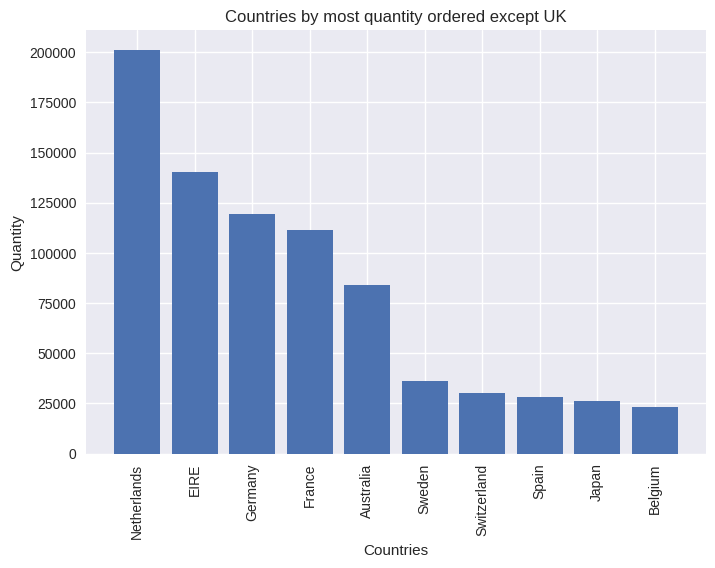

In [57]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
ax.set_ylabel('Quantity')
ax.set_xlabel('Countries')
ax.set_title('Countries by most quantity ordered except UK')
ax.bar(df_ord.index[:10],df_ord.Quantity.head(10))

plt.show()

In [16]:
# Q3 Solution
# 3)  Find Total Sale between two dates entered by user

In [49]:
while True:
  try:
    sdate = input("Enter start date in yy/mm/dd format: ")
    edate = input("Enter end date in yy/mm/dd format: ")
    sdate = pd.to_datetime(sdate, format = "%y/%m/%d").strftime("%y/%m/%d")
    edate = pd.to_datetime(edate, format = "%y/%m/%d").strftime("%y/%m/%d")
    break
  except Exception:
    print("\nDates must be realistic and in given format!\n")
print()
bet = (df_new["InvoiceDate"] >= sdate) & (df_new["InvoiceDate"] <= edate)
df_inbetwd = df_new.loc[bet].copy()
df_inbetwd["TotalSale"] = df_inbetwd['Quantity'] * df_inbetwd['UnitPrice']
df_inbetwd = df_inbetwd.loc[:,["InvoiceDate","TotalSale"]].groupby("InvoiceDate").sum()
df_inbetwd

Enter start date in yy/mm/dd format: 2011/01/01
Enter end date in yy/mm/dd format: 2011/01/10

Dates must be realistic and in given format!

Enter start date in yy/mm/dd format: 11/01/01
Enter end date in yy/mm/dd format: 11/01/10



,TotalSale
InvoiceDate,
11/01/04,12125.46
11/01/05,28803.63
11/01/06,34360.19
11/01/07,23797.79
11/01/09,15778.20
11/01/10,15346.83


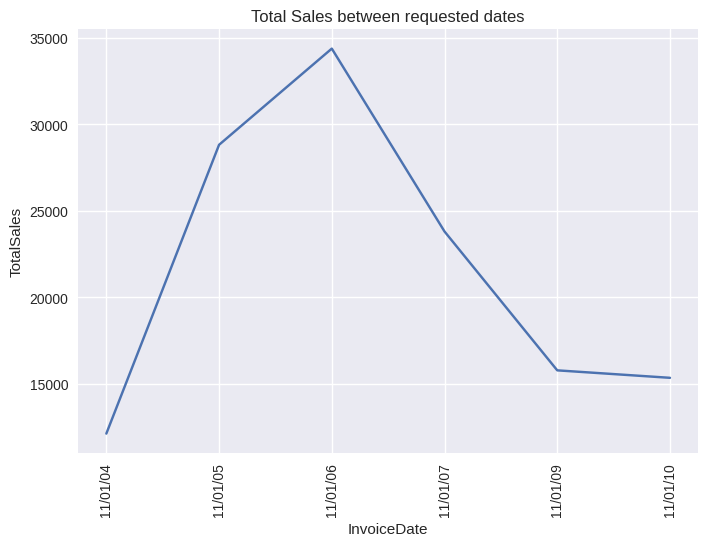

In [56]:
plt.xticks(rotation = 90)
plt.plot(df_inbetwd.index,df_inbetwd.TotalSale)
plt.title('Total Sales between requested dates')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalSales')
plt.show()

In [21]:
# Q4 Solution
# 4) Find each Countries Total SALE to find which Countries is highest potential customer

In [53]:
# if we're looking for total sale to customers in each countries, so pos quantity since we sold

df_sold = df_new.copy()
df_sold["TotalSale"] = df_sold["UnitPrice"] * df_sold["Quantity"]
df_sold = df_sold.groupby("Country").sum(numeric_only=True)
df_sold = df_sold.sort_values(by = "TotalSale", ascending = False)
df_sold = df_sold.drop("CustomerID", axis = 1)
# printing only head
df_sold.head()

,Quantity,UnitPrice,TotalSale
Country,,,
United Kingdom,4269472,1050205.164,7308391.554
Netherlands,200937,6247.730,285446.340
EIRE,140525,32179.280,265545.900
Germany,119263,33532.140,228867.140
France,111472,36832.040,209024.050


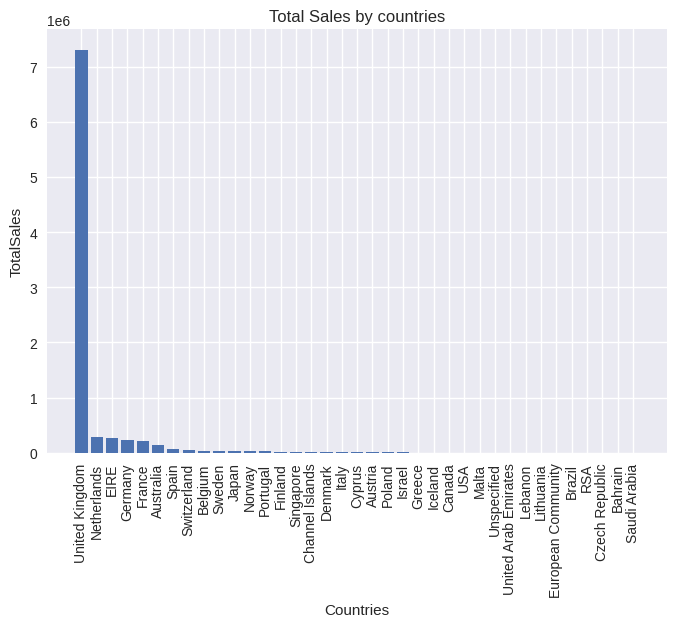

In [55]:
plt.xticks(rotation = 90)
plt.bar(df_sold.index,df_sold.TotalSale)
plt.title('Total Sales by countries')
plt.xlabel('Countries')
plt.ylabel('TotalSales')
plt.show()

In [23]:
# Q5 Solution
# 5) Which Customer Id has highest purchase in quantity and total and find out the country of it

In [24]:
df_c_tot = df_new.copy()
df_c_tot["TotalCost"] = df_c_tot["UnitPrice"] * df_c_tot["Quantity"]
df_c_new = df_c_tot.loc[:,["CustomerID","TotalCost","Country","Quantity","UnitPrice"]]
df_c_new = df_c_new.groupby(["CustomerID"]).sum(numeric_only = True)
df_hc = df_c_new.sort_values(by = "Quantity", ascending= False).head(1)
print(df_hc)
print()
print("Country =", df_c_tot.Country[df_c_tot["CustomerID"] == df_hc.index[0]].values[0])
print()

            TotalCost  Quantity  UnitPrice
CustomerID                                
14646       280206.02    197491    5176.09

Country = Netherlands



In [25]:
# Q6 Solution
# 6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

In [26]:
# considering, lowest purchase of total cost above but not including 0

df_c_tot = df_new.copy()
df_c_tot["TotalCost"] = df_c_tot["UnitPrice"] * df_c_tot["Quantity"]
df_c_new = df_c_tot.loc[:,["CustomerID","TotalCost","Country","Quantity","UnitPrice"]]
df_c_new = df_c_new.groupby(["CustomerID"]).sum(numeric_only = True)
df_hc = df_c_new.sort_values(by = "Quantity", ascending= True).head(1)
print(df_hc)
print()
print("Country =", df_c_tot.Country[df_c_tot["CustomerID"] == df_hc.index[0]].values[0])
print()

            TotalCost  Quantity  UnitPrice
CustomerID                                
17956           12.75         1      12.75

Country = United Kingdom



In [27]:
# Q7 Solution
# 7) Find the biggest order In Sale (Cost) which country was the order from and find total
#    purchase (Cost) done by that customer ID

In [28]:
df_bord = df_new.copy()
df_bord["TotalCost"] = df_bord["UnitPrice"] * df_bord["Quantity"]
df_bord = df_bord.sort_values(by = "TotalCost", ascending = False)
print("Biggest Order in sale by total Cost:")
print(df_bord[["InvoiceNo","CustomerID","Quantity","UnitPrice","TotalCost"]].head(1))
print()
print("Country of that order:")
print("Country =", df_new.Country[df_new['InvoiceNo'] == df_bord.InvoiceNo.values[0]].values[0])
print()
df_bord = df_bord.groupby(["CustomerID","TotalCost"]).sum(numeric_only = True).reset_index()
df_bord = df_bord.sort_values(by = "TotalCost", ascending = False)
print("Total purchase by that customer ID:")
print(df_bord.head(1))

Biggest Order in sale by total Cost:
       InvoiceNo  CustomerID  Quantity  UnitPrice  TotalCost
540421    581483       16446     80995       2.08   168469.6

Country of that order:
Country = United Kingdom

Total purchase by that customer ID:
       CustomerID  TotalCost  Quantity  UnitPrice
98345       16446   168469.6     80995       2.08


In [29]:
# Q8 Solution
# 8) Find how many different customers are available for each country save the count in
#    dictionary also return countries with highest and lowest customer count

In [30]:
df_totcus = df_new[["Country","CustomerID"]].copy()
df_totcus = df_totcus.groupby(["Country","CustomerID"]).count().reset_index()
df_totcus = df_totcus.groupby(["Country"]).count()
df_totcus = df_totcus.sort_values(by = "CustomerID", ascending = False)
dict_of_cus_count = df_totcus.to_dict()["CustomerID"]
print(dict_of_cus_count)
print("\n")
print("Highest and lowest customer count countries:\n")
print(df_totcus.head(1), "\n\n", df_totcus.tail(1))

{'United Kingdom': 3921, 'Germany': 94, 'France': 87, 'Spain': 30, 'Belgium': 25, 'Switzerland': 21, 'Portugal': 19, 'Italy': 14, 'Finland': 12, 'Austria': 11, 'Norway': 10, 'Netherlands': 9, 'Australia': 9, 'Denmark': 9, 'Channel Islands': 9, 'Cyprus': 8, 'Sweden': 8, 'Japan': 8, 'Poland': 6, 'USA': 4, 'Canada': 4, 'Unspecified': 4, 'Greece': 4, 'EIRE': 3, 'Israel': 3, 'Malta': 2, 'United Arab Emirates': 2, 'Bahrain': 2, 'Czech Republic': 1, 'Lithuania': 1, 'Lebanon': 1, 'RSA': 1, 'Saudi Arabia': 1, 'Singapore': 1, 'Iceland': 1, 'Brazil': 1, 'European Community': 1}


Highest and lowest customer count countries:

                CustomerID
Country                   
United Kingdom        3921 

                     CustomerID
Country                       
European Community           1


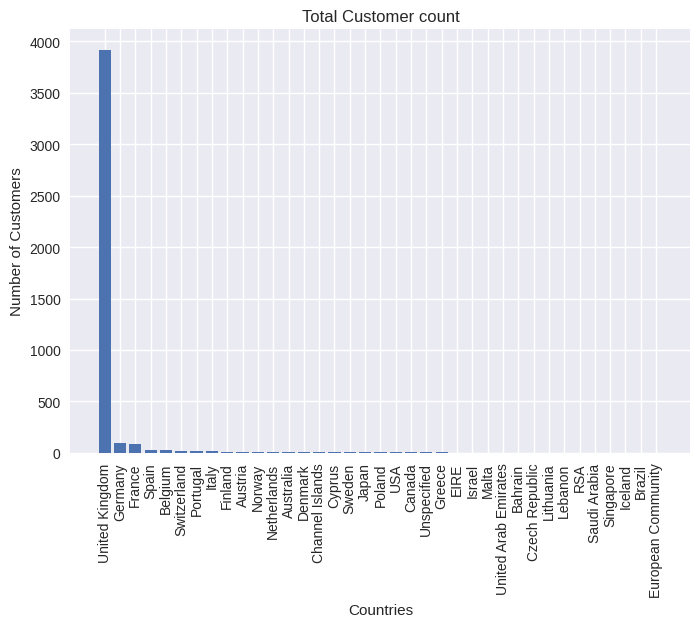

In [59]:
plt.xticks(rotation = 90)
plt.bar(df_totcus.index,df_totcus.CustomerID)
plt.title('Total Customer count')
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.show()

In [31]:
# Q9 Solution
# 9) Find which stock code was ordered the most by each country

In [33]:
df_totstock = df_new[["Country","StockCode","Quantity"]].copy()
df_totstock = df_totstock.groupby(["Country","StockCode"]).sum().reset_index("StockCode")
df_totstock.sort_values(by = "Quantity")
dictionary = df_totstock.to_dict()["StockCode"]
print(dictionary)
print("\nPrinting in a row for better readibility!\n")
dictionary

{'Australia': 'POST', 'Austria': 'POST', 'Bahrain': '85040A', 'Belgium': 'POST', 'Brazil': '84971S', 'Canada': 'POST', 'Channel Islands': 'M', 'Cyprus': 'POST', 'Czech Republic': 'POST', 'Denmark': 'POST', 'EIRE': 'M', 'European Community': 'POST', 'Finland': 'POST', 'France': 'POST', 'Germany': 'POST', 'Greece': 'POST', 'Iceland': '85232D', 'Israel': '90099', 'Italy': 'POST', 'Japan': '85232D', 'Lebanon': '85150', 'Lithuania': '85206A', 'Malta': 'POST', 'Netherlands': 'POST', 'Norway': 'POST', 'Poland': 'POST', 'Portugal': 'POST', 'RSA': 'M', 'Saudi Arabia': '22969', 'Singapore': 'M', 'Spain': 'POST', 'Sweden': 'POST', 'Switzerland': 'POST', 'USA': '85099B', 'United Arab Emirates': 'POST', 'United Kingdom': 'POST', 'Unspecified': '85213'}

Printing in a row for better readibility!



{'Australia': 'POST',
 'Austria': 'POST',
 'Bahrain': '85040A',
 'Belgium': 'POST',
 'Brazil': '84971S',
 'Canada': 'POST',
 'Channel Islands': 'M',
 'Cyprus': 'POST',
 'Czech Republic': 'POST',
 'Denmark': 'POST',
 'EIRE': 'M',
 'European Community': 'POST',
 'Finland': 'POST',
 'France': 'POST',
 'Germany': 'POST',
 'Greece': 'POST',
 'Iceland': '85232D',
 'Israel': '90099',
 'Italy': 'POST',
 'Japan': '85232D',
 'Lebanon': '85150',
 'Lithuania': '85206A',
 'Malta': 'POST',
 'Netherlands': 'POST',
 'Norway': 'POST',
 'Poland': 'POST',
 'Portugal': 'POST',
 'RSA': 'M',
 'Saudi Arabia': '22969',
 'Singapore': 'M',
 'Spain': 'POST',
 'Sweden': 'POST',
 'Switzerland': 'POST',
 'USA': '85099B',
 'United Arab Emirates': 'POST',
 'United Kingdom': 'POST',
 'Unspecified': '85213'}